Import necessary libraries

In [16]:
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, model_selection, preprocessing, svm, metrics, decomposition
np.random.seed(0) # set random seed so everyone gets same results

In [17]:
final = pd.read_csv("VAERS_final.csv")
final.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,Pain,Pyrexia,Rash,Throat.tightness,Thrombosis,Tinnitus,Tremor,Urticaria,Vomiting,labels
0,916600.0,2021-01-01,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,False,False,False,False,False,False,False,False,False,0
1,916601.0,2021-01-01,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,False,False,False,False,False,False,False,False,False,1
2,916602.0,2021-01-01,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,True,False,False,False,False,False,False,False,False,1
3,916603.0,2021-01-01,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,False,False,False,False,False,False,False,False,False,0
4,916604.0,2021-01-01,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,False,False,False,False,False,False,False,False,False,0


In [18]:
final.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'symptom_list', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME',
       'Abortion.spontaneous', 'Anaphylactic.reaction', 'Appendicitis',
       'Arthralgia', 'Asthenia', 'Chest.pain', 'Chills', 'Cough', 'COVID.19',
       'Death', 'Diarrhoea', 'Dizziness', 'Dyspnoea', 'Facial.paralysis',
       'Fatigue', 'Feeling.abnormal', 'Flushing', 'Headache', 'Hyperhidrosis',
       'Hypoaesthesia', 'Injection.site.erythema', 'Injection.site.pain',
       'Injection.site.pruritus', 'Injec

In [19]:
final.shape

(34174, 83)

In [20]:
y = final['labels']

In [21]:
X = final[["AGE_YRS", "SEX", "OTHER_MEDS","HISTORY","ALLERGIES","VAX_MANU","VAX_DOSE_SERIES"]]

In [22]:
X["AGE_YRS"] = X["AGE_YRS"].replace(np.NaN, X["AGE_YRS"].mean()) #replacing missing age values with mean of the column to prevent data loss

In [23]:
X.head()

,AGE_YRS,SEX,OTHER_MEDS,HISTORY,ALLERGIES,VAX_MANU,VAX_DOSE_SERIES
0,33.0,F,0,0,1,MODERNA,1
1,73.0,F,1,1,1,MODERNA,1
2,23.0,F,0,0,1,PFIZER\BIONTECH,1
3,58.0,F,0,1,1,MODERNA,0
4,47.0,F,0,0,0,MODERNA,1


In [24]:
X["VAX_MANU"].unique()

array(['MODERNA', 'PFIZER\\BIONTECH', 'UNKNOWN MANUFACTURER', 'JANSSEN'],
      dtype=object)

In [25]:
pd.options.mode.chained_assignment = None 
# List of the column names with features that should be ordinal encoded
ordinal_features = ['SEX','VAX_MANU']

# Ordinal encode all of these features
ordinal = sklearn.preprocessing.OrdinalEncoder()
X[ordinal_features] = ordinal.fit_transform(X[ordinal_features])

Splitting test/train data

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=True)
ss = preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [27]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results --- without hyperparameter training
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      4871
           1       0.59      0.10      0.17      1964

    accuracy                           0.72      6835
   macro avg       0.66      0.53      0.50      6835
weighted avg       0.69      0.72      0.64      6835



In [ ]:
# defining parameter range
params = {'C': [0.1, 1, 10, 100, 1000], 
              'decision_function_shape': ["ovo", "ovr"],
              'kernel': ["linear", "poly", "rbf", "sigmoid"]} 
  
grid = GridSearchCV(SVC(), params, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [32]:
grid = SVC(C=1.0, kernel='linear', decision_function_shape='ovo')
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      4871
           1       0.00      0.00      0.00      1964

    accuracy                           0.71      6835
   macro avg       0.36      0.50      0.42      6835
weighted avg       0.51      0.71      0.59      6835



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = svm.SVC(C=1, kernel="linear", decision_function_shape="ovo") 
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy)

<Figure size 432x288 with 0 Axes>

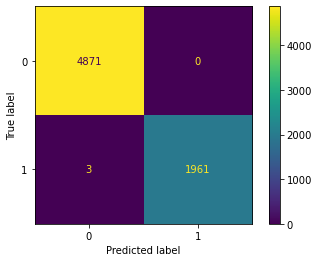

In [16]:
plt.figure()
metrics.plot_confusion_matrix(clf, X_test, y_test)
plt.show()

Visualizing SVM

In [17]:
pca = decomposition.PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train) 
X_test_2d = pca.transform(X_test) # Use the same transformation from the training data for the test data

# confirm shape is 2D
print(X_train_2d.shape)

(27339, 2)


In [15]:
y7 = [0 if y == 0 else 1 for y in y_train]

plt.figure(figsize=(10,10))
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y7, cmap=plt.cm.coolwarm, s=20)

NameError: name 'X_train_2d' is not defined

<Figure size 720x720 with 0 Axes>